# Библиотека requests и bs4

метод **.get** получает контент со страницы, но ничего туда не передает<br>
метод **.post** получает контент со страницы и вносит изменения

In [12]:
import requests
link = 'https://ru.wikipedia.org/wiki/Теория_скрытых_параметров'
responce = requests.get(link)
print(responce)

<Response [200]>


Для получения от запроса html-кода страницы используется метод **.text**<br>
Для получения байтов (напр. при скачивании картинки) **.content**

In [13]:
responce.text[:300] # первые 300 символов HTML

'<!DOCTYPE html>\n<html class="client-nojs" lang="ru" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Теория скрытых параметров — Википедия</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.","\xa0\\t,"],"wgDigitTransformTable":[""'

In [14]:
responce.content[:300]  # первые 300 символов байт-кода

b'<!DOCTYPE html>\n<html class="client-nojs" lang="ru" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>\xd0\xa2\xd0\xb5\xd0\xbe\xd1\x80\xd0\xb8\xd1\x8f \xd1\x81\xd0\xba\xd1\x80\xd1\x8b\xd1\x82\xd1\x8b\xd1\x85 \xd0\xbf\xd0\xb0\xd1\x80\xd0\xb0\xd0\xbc\xd0\xb5\xd1\x82\xd1\x80\xd0\xbe\xd0\xb2 \xe2\x80\x94 \xd0\x92\xd0\xb8\xd0\xba\xd0\xb8\xd0\xbf\xd0\xb5\xd0\xb4\xd0\xb8\xd1\x8f</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.","'

In [15]:
import requests
responce = requests.get('https://vk.com/im?sel=206256592')
j = responce.text[:100000000000000000000000000]
print(j)

            <!DOCTYPE html>
      <html lang="ru" class="vk vk_js_no vk_1x vk_flex_no r d h  vk_appAuth_no n vk_old  vk_schemes_no ">
      <head>
              <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, minimal-ui, user-scalable=no" />
        <meta name="format-detection" content="telephone=no" />
        <meta http-equiv="X-UA-Compatible" content="IE=edge" />
        <meta name="MobileOptimized" content="176" />
        <meta name="HandheldFriendly" content="True" />
        <base id="base">
        
        <meta name="description" content="ВКонтакте – универсальное средство для общения и поиска друзей и одноклассников, которым ежедневно пользуются десятки миллионов человек. Мы хотим, чтобы друзья, однокурсники, одноклассники, соседи и коллеги всегда оставались в контакте." />
        <meta property="og:description" content="ВКонтакте – универсальное средство для общения и поиска друзей 

In [13]:
import re
k = re.search('Вход', j)
ind = j.index(k.group())
print(k, ind)

<re.Match object; span=(1761, 1765), match='Вход'> 1761


<i style="font-size: 90%; color: grey;">Крч в Chrome dev tools у меня во вкладке Network нет разделов Заголовки, Куки, Запрос, Ответ, Тайминги, Стек вызовов. Или mozilla скачать, или разобраться получше</i>
https://youtu.be/F8ZYnhZ2X8g?t=239

Хотим получить текст второй аксиомы<img src="парсим_вторую_аксиому.png">

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(responce, 'lxml') # аргументы при создания класса BeautifulSoup: html-страницы, тип использумого парсера

## Соединение с интернетом

У Алисы есть веб-сервер. Боб использует настольный компьютер, который пытается подключиться к серверу Алисы. Когда одна машина хочет подсоединиться к другой, происходит следующий обмен:
<ol>
<li> Компьютер Боба посылает последовательность битов, представленных в виде низкого и высокого напряжений. <span style="background: yellow;">Запрос Боба разбит на фрагменты, к каждому фрагменту добавлен заголовок со служебной информацие (этим заведует <b>протокол TCP</b>)</span>. <span style="background: #55ff7f;"> Передачей отдельных фрагментов от компьютера Боба до компьютера Алисы заведует <b>протокол IP</b>.</span></li>
<li> Локальный маршрутизатор Боба получает эту последовательность и интерпретирует ее как пакет с помощью собственного MAC-адреса и направляет на IP-адрес Алисы. Маршрутизатор заменяет в заголовке пакета обратный адрес на свой и посылает пакет дальше.</li>
<li> Пакет Боба проходит несколько промежуточных серверов, которые направляют его по правильному физическому/проводному пути на сервер Алисы.</li>
<li> Сервер Алисы получает пакет на свой IP-адрес.</li>
<li> Сервер Алисы считывает порт назначения пакета (почти всегда это <b>порт 80 для веб-приложений</b>, это что-то вроде «номера квартиры» в пакетной передаче данных, где IP-адрес является «улицей») в заголовке и передает его в соответствующее приложение – приложение веб-сервера.</li>
<li> Веб-сервер принимает поток данных от серверного процессора. <br>
Эти данные говорят что-то вроде:<br>
•    это GET-запрос;<br>
•    запрашивается следующий файл: index.html.</li>
<li> Веб-сервер находит соответствующий HTML-файл, записывает его в новый пакет для отправки Бобу и посылает его через свой локальный маршрутизатор обратно на компьютер Боба точно таким же вышеописанным способом.</li>
</ol>

Итак, где в этом обмене задействован браузер? Абсолютно нигде - веб-браузер – это просто код

Примеры протоколов TCP:
- Всемирная Паутина (HTTP)
- Электронная почта (SMTP TCP)
- Протокол Передачи Файлов (FTP)
- Безопасный Shell (SSH)

<pre><span style="background: #00fff6;">https</span>://<span style="background: #70ff44;">vk.com</span>/im?sel=206256592</pre>
<pre><span style="background: #00fff6;">http</span>://<span style="background: #70ff44;">localhost</span><span style="background: #ff84d6;">:8888</span>/<span style="background: #ffaf6d;">notebooks</span>/Python.ipynb</pre>
<pre>https://<span style="background: #70ff44;">en.wikipedia.org</span>/<span style="background: #ffaf6d;">wiki</span>/URL?<span style="background: #e1ff00;">key=value&life=42</span><span style="background: #bbbaf2;">#History</span></pre>
<span style="background: #00fff6;">Типы протоколов: http, https, ftp...</span><br>
<span style="background: #70ff44;">Имя хоста</span><br>
<span style="background: #ff84d6;">Номер порта (можно задать напрямую после протокола): http=80, https=443</span><br>
<span style="background: #ffaf6d;">Путь</span><br>
<span style="background: #e1ff00;">Querystring (key-value pairs separated by ampersands): </span><br>
<span style="background: #bbbaf2;">Fragment (used to jump to a section within webpage):</span>

In [53]:
resp = request.urlopen("https://en.wikipedia.org/wiki/Principal_part#Calculus")
print(resp, type(resp), dir(resp))

<http.client.HTTPResponse object at 0x0143EF40> <class 'http.client.HTTPResponse'> ['__abstractmethods__', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_abc_impl', '_checkClosed', '_checkReadable', '_checkSeekable', '_checkWritable', '_check_close', '_close_conn', '_get_chunk_left', '_method', '_peek_chunked', '_read1_chunked', '_read_and_discard_trailer', '_read_next_chunk_size', '_read_status', '_readall_chunked', '_readinto_chunked', '_safe_read', '_safe_readinto', 'begin', 'chunk_left', 'chunked', 'close', 'closed', 'code', 'debuglevel', 'detach', 'fileno', 'flush', 'fp', 'getcode', 'getheader', 'getheaders', 'geturl', 'headers', 'info', 'isat

In [35]:
resp.code # 200 - ok, 400 - bad request, 403 - forbidden, 404 - not found...

200

In [36]:
resp.length # size of the response in bytes

43527

In [37]:
data = resp.read()
type(data)

bytes

In [52]:
html = data.decode("utf-8")
print(html[:9000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Principal part - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YA7kHwpAMNUAA5tykwMAAACS","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Principal_part","wgTitle":"Principal part","wgCurRevisionId":978736968,"wgRevisionId":978736968,"wgArticleId":1225337,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Complex analysis","Generalized functions"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"Principal_part","wgRelevantArticleId":1225337,"wgIsP

In [ ]:
# тот же вывод можно получить с помощью библиотек Requests и BeautifulSoup
class MyReader(urllib.request):
    from urllib import request
    def super().__init__(self, *args, **kwargs):
        pass
    
    # написать свой класс, который наследуется от фич urllib

def read_html_with_urllib(adress, encoding):
    resp = request.urlopen(adress) # открывает
    data = resp.read()
    html = data.decode(encoding)
    
    
    
def read_html_bs4(adress, encoding):
    resp = request.urlopen(adress)
    bs_object = bs4.BeautifulSoup(resp.read())
    h1 = 

In [45]:
resp.read() #один раз прочтя файл указатель (курсор) останется на том месте, 
# где был последний раз - в концe файла,
# поэтому выдаст сейчас пустую байтовую строчку

b''

https://www.youtube.com/watch?<span style="background: #e1ff00;">v=LosIGgon_KM</span>&<span style="background: #bbbaf2;">t=5m56s</span><br>
v - ID видео<br>
t - время, с которого начинается воспроизведение<br>

In [49]:
from urllib import parse
#Задать параметры запроса можно с помощью функции urlencode в модуле parse
params = {"v": "LosIGgon_KM", "t":"5m56s"}
querystring = parse.urlencode(params)
print(querystring)

v=LosIGgon_KM&t=5m56s


# Пакеты, модули, переменные среды

<img src="example_of_module.png" style="display: float; float: left; width: 250px; margin-right: 5px;">В файле units.py ничего особенного не записано, он просто хранит единицы измерения. При импорте этого файла (модуля) все переменные и функции из этого модуля попадают в namespace текущей программы. Это удобно для организации кода

Код в блокноте записан последовательно, но можно изменить порядок выполнения, запуская отдельные ячейки в произвольном порядке. При этом <span style="background: #dfff51;">значения переменных</span> и другие результаты вычислений будут <span style="background: #dfff51;">определяться порядком **выполнения** ячеек с кодом, а не порядком их **записи** в блокноте</span>!

Пременные и функции имеют свою **область видимости (scope)** - видимость имени зависит от того, в каком месте кода оно определено.

Просмотреть список имен пользовательских переменных и функций в текущей области видимости можно с помощью волшебных команд: **%who** и **%whos**.

In [15]:
%who

link	 requests	 responce	 


In [16]:
%whos

Variable   Type        Data/Info
--------------------------------
link       str         https://ru.wikipedia.org/<...>Теория_скрытых_параметров
requests   module      <module 'requests' from '<...>\\requests\\__init__.py'>
responce   Response    <Response [200]>


# Прогрессии, комбинаторика, формула Эйлера, волновые функции 
## (ага, в одном флаконе)

По формуле Бинома Ньютона мы можем представить в виде полинома моном степени n:<br>
${\displaystyle (a+b)^n = \sum_{k=0}^n \binom{n}{k} a^{n - k} b^k = {n\choose 0}a^n + {n\choose 1}a^{n - 1}b + \dots + {n\choose k}a^{n - k}b^k + \dots + {n\choose n}b^n}$<br>
Разности оночленов степени n можно представить как (вывести как-то из степени суммы - поч второй множитель - это бином Ньютона без коэффициентов?)
поч <br>
a²-b² = (a-b)(a+b)<br>
a³-b³ = (a-b)(a²+ab+b²)<br>
a⁴-b⁴ = (a-b)(a³+a²b+ab²+b³)<br>
a⁵-b⁵ = (a-b)(a⁴+a³b+a²b²+ab⁴+b⁴)<br>
aⁿ-bⁿ = (a-b)(aⁿ⁻¹ + aⁿ⁻²b + ... + abⁿ⁻² + bⁿ⁻¹) = <font color="blue">**aⁿ** <span style="background: #FFDFF7;">+ aⁿ⁻¹b </span> + ... <span style="background: #D0FF76;">+ a²bⁿ⁻²</span><span style="background: #FFFAAE;">+ abⁿ⁻¹</span></font> <font color="red"><span style="background: #FFDFF7;">- baⁿ⁻¹</span> - b²aⁿ⁻² - ... <span style="background: #D0FF76;">-a²bⁿ⁻²</span><span style="background: #FFFAAE;"> -abⁿ⁻¹</span> **- bⁿ**</font> - все сократилось, осталось aⁿ - bⁿ<br>
При замене a = q, b = 1 получим формулу геометрической прогресси

Prove that<br>
$cosθ + cos3θ + cos5θ + ... + cos(2n - 1)θ = \frac{\displaystyle sin 2nθ}{\displaystyle 2sinθ}$
<br><br>
$sinθ + sin3θ + sin5θ + ... + sin(2n - 1)θ = \frac{\displaystyle sin² nθ}{\displaystyle sinθ}$<br>

Use Euler's formula and geometric progression formula
<br>
<div style="margin-top: 5px; border: 4px outset orange; border-radius: 2px; padding: 3px;"><div style="text-align: center;">Superposition Principle</div>Силу взаимодействия неподвижных точечных зарядов можно вычислить с помощью закона Кулона. Но из-за чего между двумя противоположными происходит взаимодействие?<br></div> 



И спросить, можно ли цветом выделять


<display><summary>Диалог с Тёмой по поводу поля</summary></display>

Материя может существовать в виде вещества и поля. Поле не является веществом, скорее это измененное пространство.

Поле, создаваемое неподвижными электрическими зарядами - **электростатическое поле**

Напряженность электрического поля в данной точке пространства называется физическая величина, равная отношению силы, действующей на пробный положительный заряд, помещенный в данную точку поля к величине этого заряда 

Немного инстайтов из физики: как ты знаешь, 

Как решается уравнение $x^2 + 1 = 0\\
x^2 = -1\\
x = \sqrt{-1}\in\mathbb{R}=\emptyset$ т.к. во множестве действительных числел не существует таких, которые при возведенеии в квдарат давали бы отрицательное число. <br>В комплексной плоскости, если $x$ представляем как $x = a+ib$ появляются два корня:<br>
$ (a+bi)^2 + 1 = 0 \\
a^2 + 2abi + b(i)^2 = -1$
<details><summary>$\begin{cases}
{x_1}^2 = i^2 = -1\\
{x_2}^2 = -i^2 = 1\end{cases}$</summary></details>

высоцикй

## Корни из комплексного числа
Найти корень 

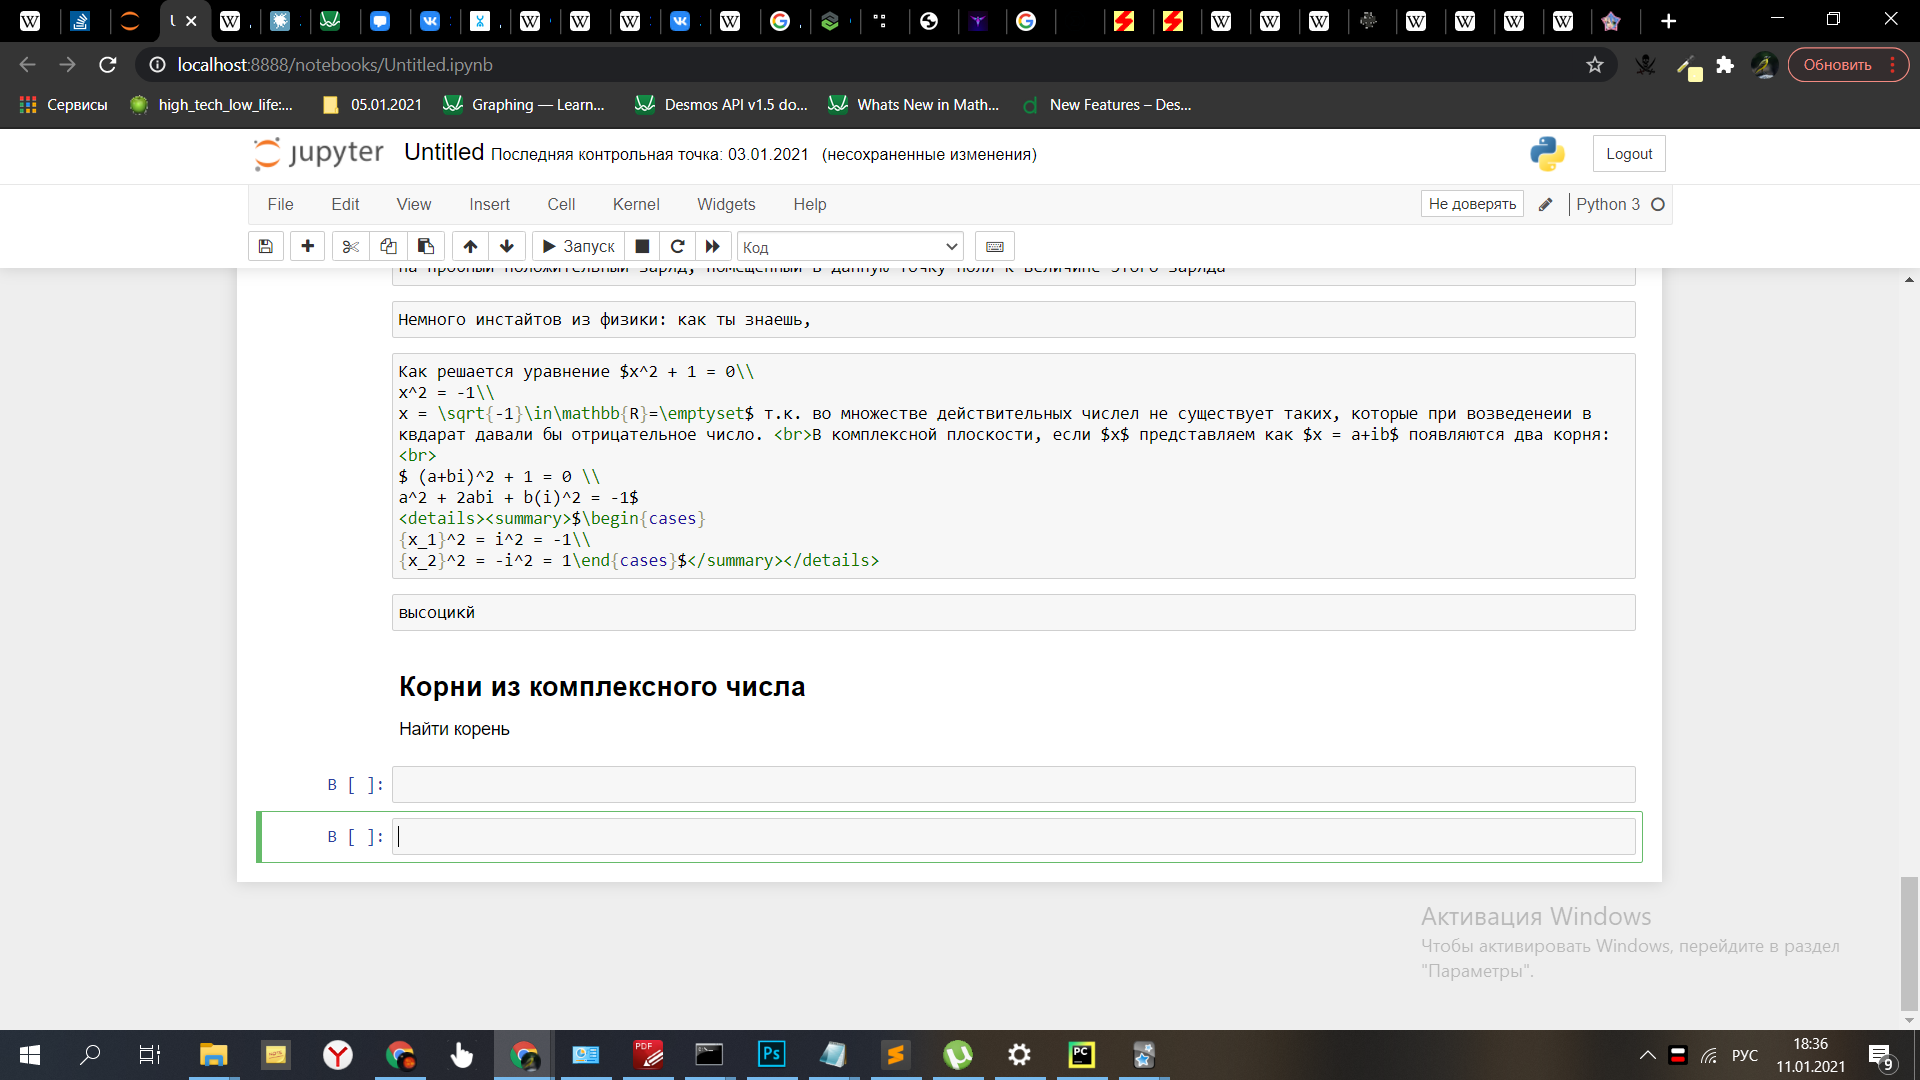

## Desmos inside Python 

In [1]:
%%HTML
<iframe src="https://teacher.desmos.com/activitybuilder/custom/6001874e2d6e510d0a600dcd" width="680" height="480"></iframe>

In [ ]:
<script src="https://www.desmos.com/api/v1.5/calculator.js?apiKey=dcb31709b452b1cf9dc26972add0fda6"></script>

In [3]:
%%HTML
<iframe src="https://www.desmos.com/calculator/wh1nfeikhp?lang=ru" width="1000" height="480"></iframe>

## ipywidgets

In [10]:
# А еще сюда можно добавлять интерактивчик :>
from ipywidgets import interact
def f(x):
    return x
interact(f, x=10)  # slider
interact(f, x=True)  # checkbox
interact(f, x="Hi!")  #textbox
interact(f, x=['orange', 'apple'])

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='Hi!', description='x'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Dropdown(description='x', options=('orange', 'apple'), value='orange'), Output()), _dom_…

<function __main__.f(x)>

**interact** can also be used as a decorator. This allows you to define a function and interact with it in a single shot.
As this example shows, interact also works with functions that have multiple arguments.

In [9]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

Кстати, смари как можно посчитать числа Фибоначчи, с помощью декортора

In [28]:
%%time
def fib(n: int) -> int:  # уже на 35 считает капец долго
    if n < 2: # базовый (стартовый) случай рекусрии
        return n
    return fib(n-2) + fib(n-1)

fib(35)

Wall time: 8.45 s


9227465

Можно сохранять уже посчитанные результаты в словарь (и снова модуль для бесполезной статической типизации в силе XD)

In [29]:
%%time 
from typing import Dict
memo: Dict[int, int] = {0: 0, 1: 1}  # базовые случаи рекурсии

def fib_memo(n: int) -> int:
    if n not in memo:
        memo[n] = fib_memo(n-1) + fib_memo(n-2)
    return memo[n]

fib(35)

Wall time: 8.52 s


9227465

А можно юзать готовый декоратор кеша:

In [31]:
%%time
from functools import lru_cache

@lru_cache(maxsize=None)  # и так значение по умолчанию, но можно задать размер
def fib_cache(n: int) -> int:
    if n < 2:  # базовый случай
        return 2
    return fib_cache(n-2) + fib_cache(n-1)  # рекурсивный случай

fib_cache(50)

Wall time: 2 ms


40730022148

Или даже написать свой!

In [42]:
%%time
def my_decorator(func):  # принимает функцию
    cache = {}
    def wrapper(*args, **kwargs):  # принимает
# все аргуементы и значения по умолчанию, которые есть у декорируемой функции
        key = str(args) + str(kwargs)
        if key not in cache:
            cache[key] = func(*args, **kwargs)
        return cache[key]
    return wrapper

@my_decorator
def fib_my(n):
    return fib_my(n-2) + fib_my(n-1)

fib_my(10)

RecursionError: maximum recursion depth exceeded while getting the repr of an object

In [44]:
def decorator_example(old_func):
    def wrapper(old_func_arg):
        old_func_arg + 10
        return old_func(old_func_arg)
    return wrapper


@decorator_example
def product(x: int) -> int:
    return x ** 2

product(3)

9